<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/DIP_course_7th_session_Spatial_Filtering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Görüntü Filtreleme - Uzamsal Filtreleme
![convolution](https://static1.squarespace.com/static/5a8dbb09bff2006c33266320/t/5baff4441905f4c995f31810/1538257990895/)

Bu bölümde farklı çekirdeklerin (doğrusal veya doğrusal olmayan) nasıl tanımlanacağını ve bunların Python'da OpenCV kullanılarak dijital görüntülere nasıl uygulanacağını göreceksiniz.

Sözdizimi ve kodlarla ilgili tüm ayrıntıları ve bilgileri OpenCV'de bulabilirsiniz. [doküman merkezi](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20boxFilter(InputArray%20src,%20OutputArray%20dst,%20int%20ddepth,%20Size%20ksize,%20Point%20anchor,%20bool%20normalize,%20int%20borderType). Belgelere bakmanızı önemle tavsiye ederiz. _OpenCV belgeleri_ ve eğitimler, görüntü işlemeyi ve bunun nasıl kodlanacağını öğrenmenin en iyi kaynaklarından biridir.

Görüntü filtreleme için gerekli paketleri içe aktarın.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

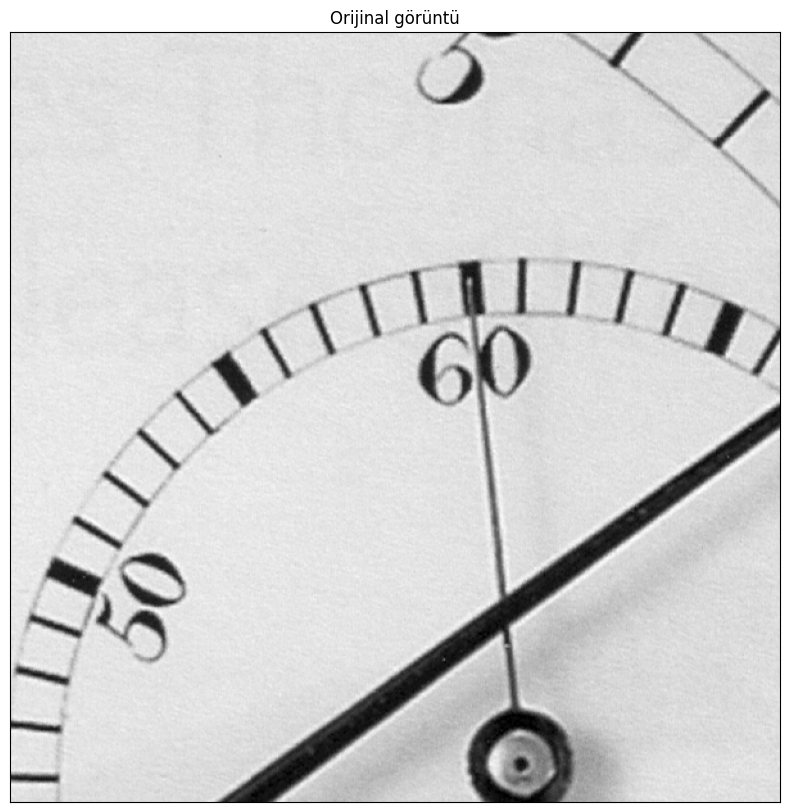

In [2]:
ref = cv2.imread('chronometer.tif')
ref = ref[1500:2100, 1500:2100, :]

plt.figure(figsize=(10, 10))
plt.imshow(ref), plt.grid(False)

# mekansal filtrelemenin nasıl yapıldığını öğrenirken,
# farklı python komutlarının nasıl uygulanacağını da not edebilirsiniz.
plt.title('Orijinal görüntü')
plt.xticks([])
plt.yticks([])
plt.show()

Dijital görüntü işlemede görüntüye filtre uygulanmasında iki temel faktör vardır; __1)__ çekirdek türü (ve boyutu) ve __2)__ doldurma yöntemi (doldurma, görüntünün sınırları üzerinden çekirdek çıktısını tanımlayan ekstrapolasyon prosedürüdür).

OpenCV'de çekirdeği tanımlamak ve dolgu yöntemini tanıtmak için farklı yöntemler vardır. Çekirdek parametrelerinin çok kolay tanımlandığı MATLAB'ın aksine, OpenCV'de parametreler üzerinde daha fazla kontrole sahipsiniz ve hedefe ulaşmak için daha uzun bir yol kat etmeniz gerekiyor.


## 1-Ortalama filtresi
Aşağıda çok basit bir ortalama alma çekirdeğini nasıl tanımlayacağınızı ve bunu resimlerinize nasıl uygulayacağınızı göreceksiniz.

In [3]:
# Numpy kullanarak çekirdek tanımlama.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

print(kernel_5)
print(kernel_3)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


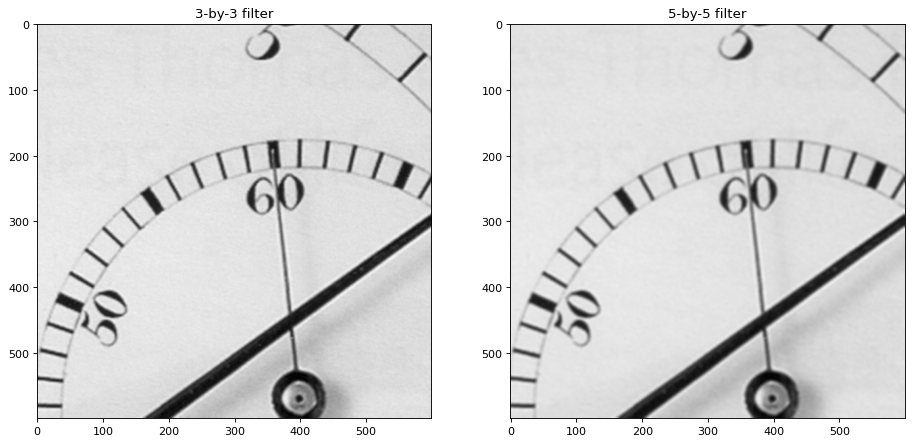

In [4]:
# Numpy kullanarak çekirdek tanımlama.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9


# Bir görüntüyü çekirdekle evriştirir.
# -1, çekirdeğin merkezinin merkez pikselde bulunduğu anlamına gelir.
# iki çekirdek boyutunu karşılaştırın.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# sonuçları iki alt grafikte çizin.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
# plt.xticks([])
# plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
# plt.xticks([])
# plt.yticks([])

plt.show()

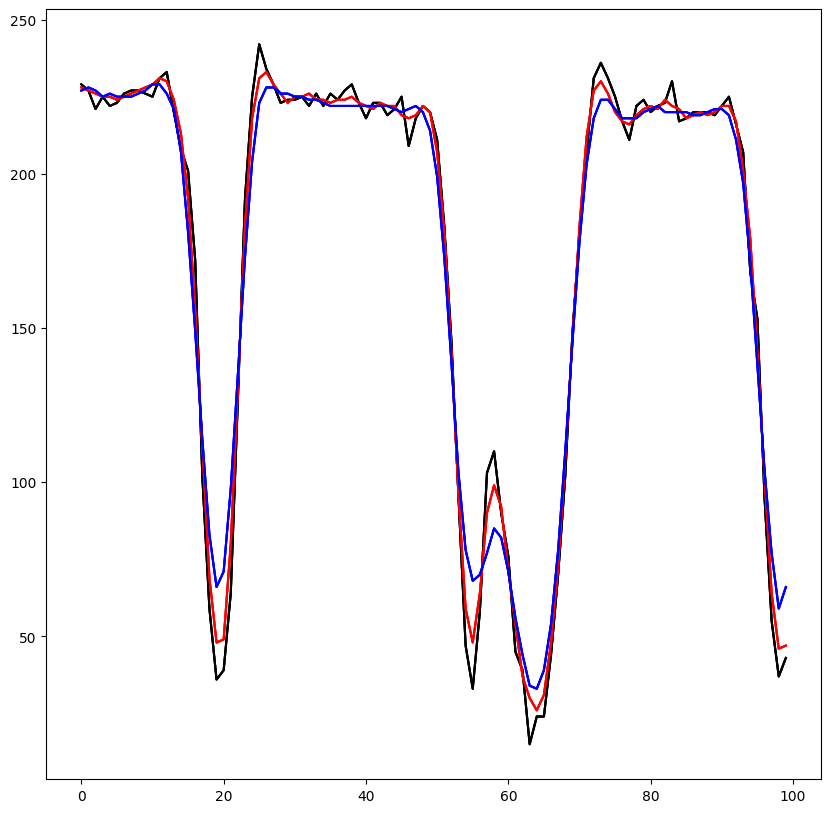

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(ref[210, 300:400], 'k', label='reference')
plt.plot(filtered_3[210, 300:400], 'r', label='3*3 kernel')
plt.plot(filtered_5[210, 300:400], 'b', label='5*5 kernel')
plt.show()

OpenCV'deki görüntüler üzerinde 2B uzamsal filtre gerçekleştirmeye yönelik tam komut, aşağıdaki parametre listesiyle birlikte cv2.filter2D'dir. Bazı parametrelerin mutlaka kullanılması gerekmez.

**cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])**

**src** – giriş görüntüsü.

**ddepth** –
hedef görüntünün istenen derinliği; negatifse src.derinlik() ile aynı olacaktır; aşağıdaki src.third() ve dlength kombinasyonları desteklenir:

src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F

src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_64F, ddepth = -1/CV_64F

when ddepth=-1, the output image will have the same depth as the source.

**kernel** – evrişim çekirdeği (veya daha doğrusu bir korelasyon çekirdeği), tek kanallı bir kayan nokta matrisi; Farklı kanallara farklı çekirdekler uygulamak istiyorsanız, split() işlevini kullanarak görüntüyü ayrı renk düzlemlerine bölün ve bunları ayrı ayrı işleyin.

**anchor** – çekirdek içindeki filtrelenmiş bir noktanın göreceli konumunu gösteren çekirdeğin çapası; çapa çekirdeğin içinde yer almalıdır; varsayılan değer (-1,-1), çapanın çekirdek merkezinde olduğu anlamına gelir.

_Çapa, çekirdeğin merkezinin orta pikselde olduğunu belirten tek bir -1 ile değiştirilebilir._

**delta** – Filtrelenen piksellere dst'de saklanmadan önce eklenen isteğe bağlı değer.

**borderType** – piksel ekstrapolasyonu yöntemi (Bak [borderInterpolate()](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#int%20borderInterpolate(int%20p,%20int%20len,%20int%20borderType) for details).

Basit bir ortalama filtre uygulamanın bir başka basit yolu da 'cv2.blur()' fonksiyonunu kullanmaktır. Fonksiyon aşağıdaki gibi uygulanabilir:


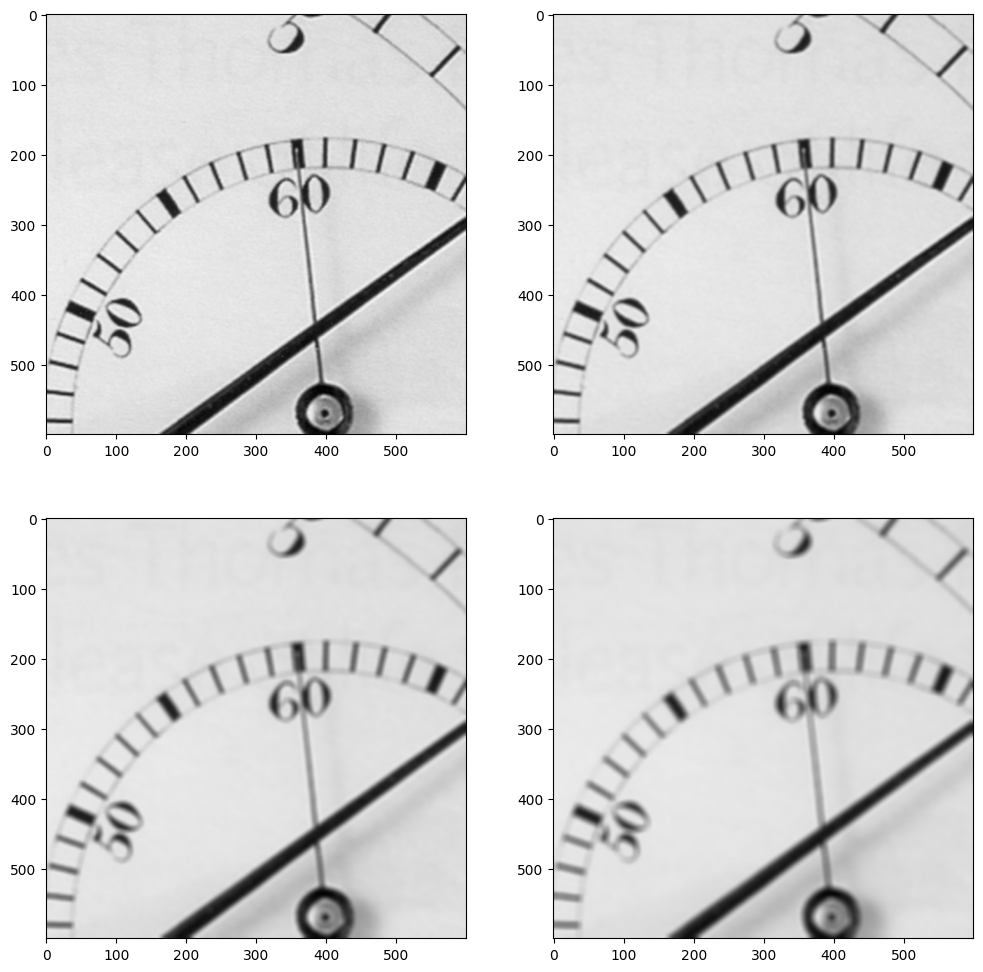

In [6]:
# daha fazla bilgi için dokümanları kontrol edebilirsiniz.
blurred_3 = cv2.blur(ref, (3, 3), -1)
blurred_5 = cv2.blur(ref, (5, 5), -1)
blurred_9 = cv2.blur(ref, (9, 9), -1)
blurred_11 = cv2.blur(ref, (11, 11), -1)

plt.figure(figsize=(12, 12))
plt.subplot(221), plt.imshow(blurred_3)
plt.subplot(222), plt.imshow(blurred_5)
plt.subplot(223), plt.imshow(blurred_9)
plt.subplot(224), plt.imshow(blurred_11)
plt.show()

## 2-Dolgu malzemesi

Daha önce de belirttiğimiz gibi, bir görüntüye filtre uygulamanın en önemli faktörlerinden biri, çekirdeğin bazı kısımları görüntü sınırının dışına bırakılırken görüntünün kenarlık değerlerinin nasıl tahmin edileceğini anlamaktır. "_borderType_", çekirdeklerin bu işlevselliğini yöneten parametredir. Normalde fonksiyon doğrudan çağrılmaz. İçeride kullanılır [Filtre Motoru](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#FilterEngine) ve [copyMakeBorder()](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20copyMakeBorder(InputArray%20src,%20OutputArray%20dst,%20int%20top,%20int%20bottom,%20int%20left,%20int%20right,%20int%20borderType,%20const%20Scalar&%20value) hızlı ekstrapolasyon için tabloları hesaplamak. Bu, önce kenarlıklı (yastıklı) görüntüyü oluşturmamız ve ardından filtreyi orijinal görüntü yerine bu görüntünün üzerine uygulamamız gerektiği anlamına gelir.

Çeşitli kenarlık türleri, görüntü sınırları '|' ile gösterilir

* BORDER_REPLICATE:    **_aaaaaa|abcdefgh|hhhhhhh_**
* BORDER_REFLECT:       **_fedcba|abcdefgh|hgfedcb_**
* BORDER_REFLECT_101:   **_gfedcb|abcdefgh|gfedcba_**
* BORDER_WRAP:          **_cdefgh|abcdefgh|abcdefg_**
* BORDER_CONSTANT:      **_iiiiii|abcdefgh|iiiiiii_**  belirli bir 'i' ile

Kenarlıklı bir görüntü oluşturmak için aşağıdaki komutu ve argümanları kullanırız. Bu komutu kullanarak görüntünün her iki tarafına farklı kenarlık boyutları ekleyebilirsiniz.

**cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]])**

**src** – Kaynak görseli.

**Size(src.cols+left+right, src.rows+top+bottom)**

_top, bottom, left, right_ – Kaynak görüntü dikdörtgeninden her yönde kaç pikselin tahmin edileceğini belirten parametre. Örneğin, 'üst=1, alt=1, sol=1, sağ=1' 1 piksel genişliğinde kenarlık yapılması gerektiği anlamına gelir.

**borderType** – Sınır türü. Yukarıda açıklanan kenarlık türlerinden biri.

**value** – Sınır değeri ise `borderType==BORDER_CONSTANT` .


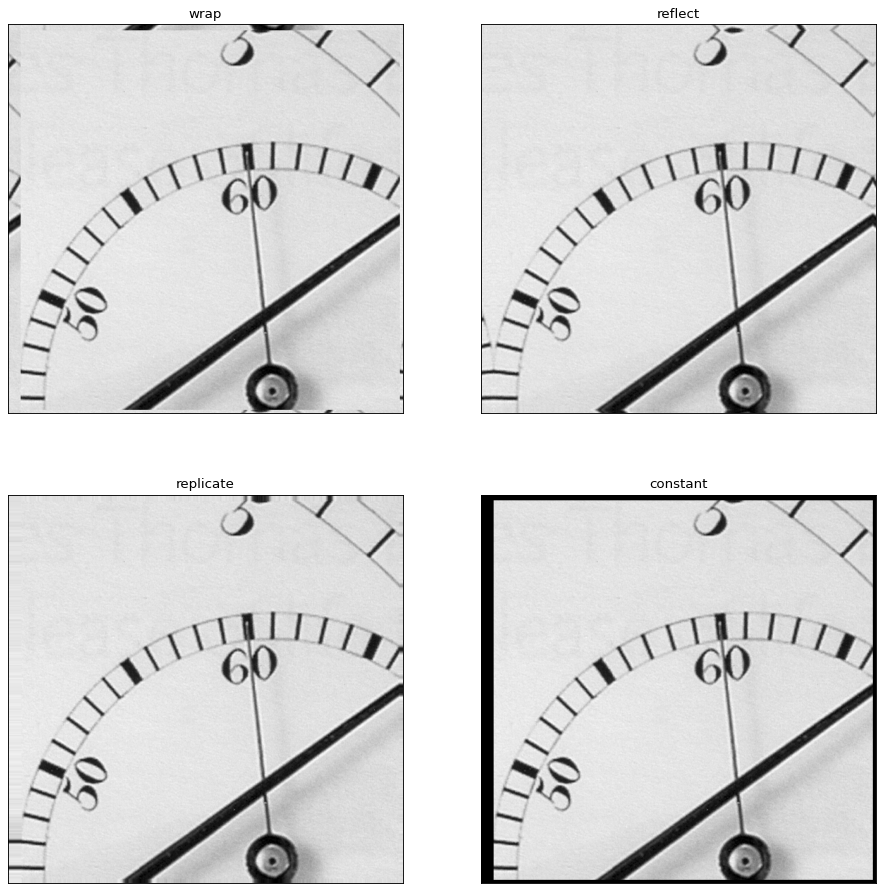

In [7]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_CONSTANT, const)

# Görüntüleri göster
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

## 3-Kullanıcı tanımlı çekirdekler

Kullanıcı tanımlı çekirdekler tıpkı 1. bölümde uyguladığımız gibi uygulanabilir. Örneğin, aşağıdaki çekirdeği (dikey degrade filtresi olan) görüntüye uygulamayı düşünün.

$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$



(([], []), ([], []))

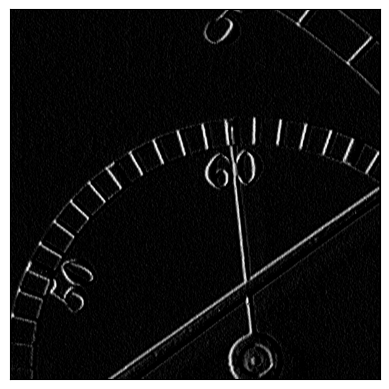

In [8]:
# dikey degrade çekirdeği
# rastgele bir çekirdek tanımlayın
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

#uygula.
filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)

# farklı bir renk haritasında göster.
plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## 4-Medyan filtreleme

Medyan filtre, tuz ve biber gürültüsünü ortadan kaldırmada veya azaltmada çok kullanışlı olan doğrusal olmayan bir filtredir. OpenCV'deki _medianBlur_ işlevi medyan filtrelemeyi gerçekleştirmek için tasarlanmıştır.

**cv2.medianBlur(src, ksize[, dst])**

**src** – giriş 1-, 3- veya 4-kanallı görüntü; ksize 3 veya 5 olduğunda görüntü derinliği CV_8U, CV_16U veya CV_32F olmalıdır, daha büyük açıklık boyutları için yalnızca CV_8U olabilir.

**ksize** – açıklık doğrusal boyutu; tek olmalı ve 1'den büyük olmalıdır, örneğin: 3, 5, 7 ...

Medyan filtrelemenin etkisini daha iyi anlayabilmek için öncelikle görüntüye bir miktar gürültü ekliyoruz.

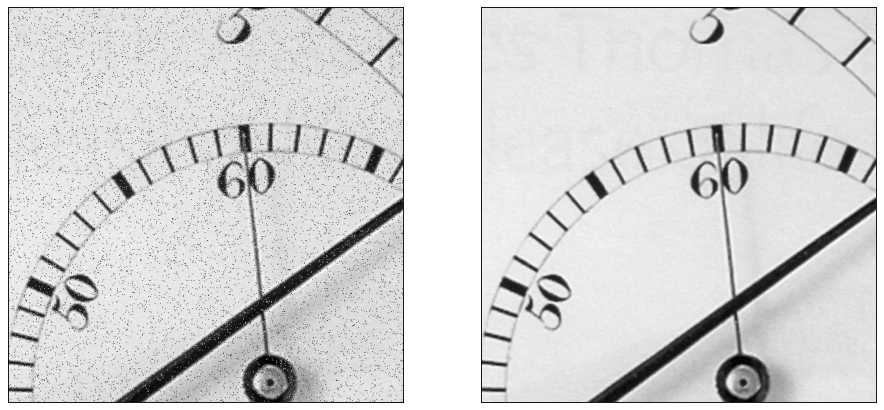

In [9]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])

# %5 tuz ve biber gürültüsünü dikkate alırsak
# %2,5 tuz ve %2,5 karabiber. Böylece:
salt = s_and_p > .975
pepper = s_and_p < .025

# biraz gürültü eklemek için siyah (biber) konumlarını kapatmalıyız ve
# beyaz (beyaz) konumları aç.
channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]

# boyut 3 olan medyan filtresini uygula
Med = cv2.medianBlur(noisy, 3)

# Sonuçları göster
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()

## 5- Gauss filtreleme

Bir görüntü üzerinde Gauss filtrelemesi gerçekleştirmenin birden fazla yolu vardır:

* `cv2.GaussianBlur()` fonksiyonunu kullanarak,
* ve iki ayrı yatay ve dikey kernel oluşturup uyguladıktan sonra `cv2.sepFilter2D()` kullanarak.

Ama öncelikle gürültülü bir imaja sahip olmamız gerekiyor; özellikle Gauss gürültüsü eklenmiş. Böyle bir görüntü oluşturmak için, rastgele Gauss gürültüsü oluşturmak ve ardından onu görüntüye eklemek için Numpy'yi kullanırız.

(<matplotlib.image.AxesImage at 0x7b6e1f478c40>, None)

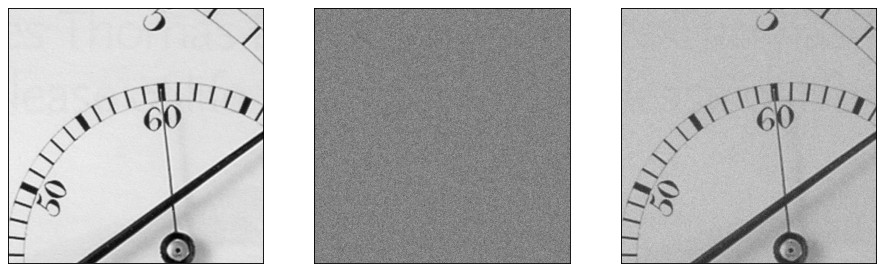

In [10]:
# Önceden tanımlanmış ortalama ve standart ile rastgele normal (gauss) gürültü oluşturma.
# Gürültülü görüntü, referans görüntünün boyutunda olmalıdır.
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))

# cvtColor() kullanarak RGB görüntüsünü Gri tonlamalı görüntüye dönüştürün
gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Görüntüye Gauss gürültüsü ekleyin
g_noisy = gray + gauss_noise # Gauss gürültülü görüntü

# Gri görüntü, gürültülü görüntü ve gürültülü görüntü gösteriliyor
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

Şimdi, yukarıda oluşturulan "g_noisy" görüntüsündeki Gauss gürültüsünü azaltmak için basit "cv2.GaussianBlur()" yöntemini kullanıyoruz.

**cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])**

**src** – giriş görüntüsü; görüntüde bağımsız olarak işlenen herhangi sayıda kanal bulunabilir, ancak derinlik "CV_8U", "CV_16U", "CV_16S", "CV_32F" veya "CV_64F" olmalıdır.

**ksize** – Gauss çekirdek boyutu. "ksize.width" ve "ksize.height" farklı olabilir ancak her ikisinin de pozitif ve tek olması gerekir. Veya sıfır olabilirler ve sigma*'dan hesaplanırlar.

**sigmaX** – X yönünde Gauss çekirdeği standart sapması.

**sigmaY** – Y yönünde Gauss çekirdeği standart sapması; sigmaY sıfır ise, sigmaX'e eşit olacak şekilde ayarlanır, eğer her iki sigma da sıfır ise, bunlar sırasıyla 'ksize.width' ve 'ksize.height'tan hesaplanır (ayrıntılar için getGaussianKernel()'a bakın); Tüm bu anlambilimde gelecekteki olası değişikliklere bakılmaksızın sonucu tam olarak kontrol etmek için, 'ksize', 'sigmaX' ve 'sigmaY'nin tamamının belirtilmesi önerilir.

**borderType** – piksel ekstrapolasyonu yöntemi.

(([], []), ([], []))

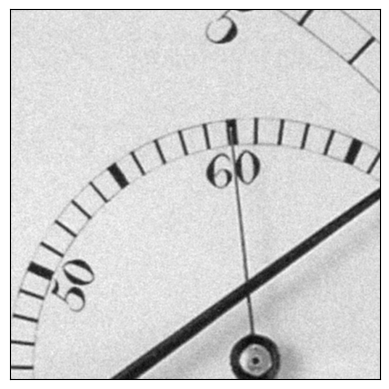

In [11]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Sonucu göster
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

`cv2.sepFilter2D()` fonksiyonunu kullanabilmek için Gauss çekirdeği oluşturmalıyız. Bu, 'cv2.getGaussianKernel()' kullanılarak yapılır. 1 boyutlu Gauss katsayıları oluşturur.

**cv2.getGaussianKernel(ksize, sigma[, ktype])**

**ksize** – Diyafram boyutu. Tuhaf ve pozitif olmalı.

**sigma** – Gauss standart sapması. Pozitif değilse ksize'den `sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8' şeklinde hesaplanır.

**ktype** – Filtre katsayılarının türü. 'CV_32f' veya 'CV_64F' olabilir.


[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x7b6e1f3fa980>, None)

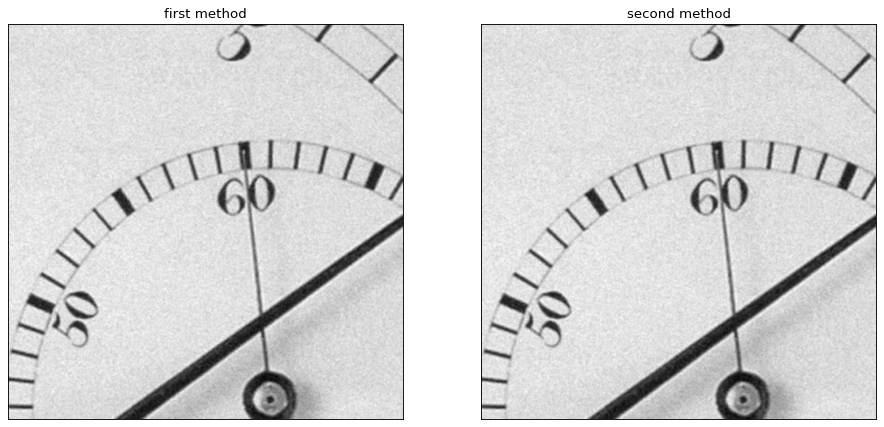

In [13]:
# Tek bir Gauss çekirdeği oluştur
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

# Görüntünün üzerine iki ayrı çekirdek uygulayın.
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Sonuçları gösteriyor.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('first method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)

Bu resimde açıklanan Evrişim ve Dolgu

![Bu resimde açıklanan Evrişim ve Dolgu](http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/Wiki-BoxConvAnim.gif)